## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [51]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 

In [68]:
function lennardjones_eq(S::AbstractString)
    T(r, at) = trace(stress(lennardjones(r0=r), at))
    at = JuLIP.ASE.bulk(S, cubic=true, pbc=true)
    r0 = rnn("Al")
    r1 = r0 - 0.1
    s0, s1 = T(r0, at), T(r1, at)
    while (abs(s1) > 1e-8) && abs(r0 - r1) > 1e-8
        rnew = (r0 * s1 - r1 * s0) / (s1 - s0)
        r0, r1 = r1, rnew
        s0, s1 = s1, T(rnew, at)
    end
    return lennardjones(r0=r1)
end 
r0 = rnn("Al")

2.8637824638055176

 a : 4.05xc: 27.20593340615241 yc: 28.35 minimum index : [143,158] minimum : 2.0503124999999844I0 = 158
X12[I0] = [28.6378,28.35]
xcore = [29.3538,27.3375]


F0 = [2.86378 0.0 0.0; 0.0 4.05 0.0; 0.0 0.0 2.86378]
i = 1
F = [-0.00984784 0.0100238 0.0; -0.0107162 0.00518476 0.0; 0.0 0.0 0.0]
[uF[i,1] uF[i,2] 0;uF[i,3] uF[i,4] 0;0 0 0] = [-0.00977158 0.0101057 0.0; -0.0106332 0.00527387 0.0; 0.0 0.0 0.0]
p[:,i] = [1.43193,2.02222,1.43189]
i = 2
F = [-0.0106927 0.0127651 0.0; -0.0112636 0.00672847 0.0; 0.0 0.0 0.0]
[uF[i,1] uF[i,2] 0;uF[i,3] uF[i,4] 0;0 0 0] = [-0.0106119 0.012867 0.0; -0.0111785 0.00683581 0.0; 0.0 0.0 0.0]
p[:,i] = [1.43289,2.02273,1.43189]
i = 3
F = [-0.0108919 0.0157315 0.0; -0.0111078 0.00791065 0.0; 0.0 0.0 0.0]
[uF[i,1] uF[i,2] 0;uF[i,3] uF[i,4] 0;0 0 0] = [-0.0108144 0.0158498 0.0; -0.0110287 0.0080313 0.0; 0.0 0.0 0.0]
p[:,i] = [1.43428,2.0234,1.43189]
i = 4
F = [-0.0100985 0.0184736 0.0; -0.0101213 0.00821407 0.0; 0.0 0.0 0.0]
[uF[i,1] uF[i,2] 0;uF[i,3] uF[i,4] 0;0 0 0] = [-0.0100345 0.0185973 0.0; -0.0100572 0.00833804 0.0; 0.0 0.0 0.0]
p[:,i] = [1.43604,2.02403,1.43189]
i = 5
F = [-0.00823652 0.0205575 0.0; -0.008551

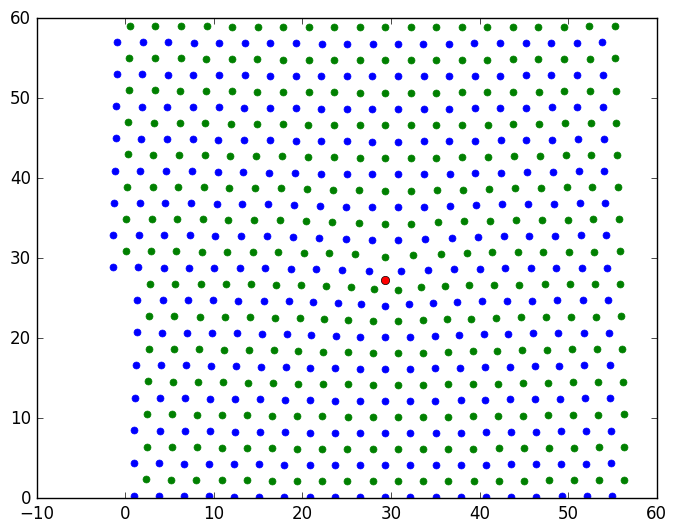

p[:,i] = [1.43248,2.02837,1.43189]


3×600 Array{Float64,2}:
 0.934858  0.980877  1.03858   1.108   …  55.3793   55.3309   55.2947 
 0.357466  4.43164   8.51149  12.5945     50.9819   55.0063   59.0386 
 0.0       0.0       0.0       0.0         1.43189   1.43189   1.43189

In [55]:
# anisotropic elasticity solution for an FCC edge dislocation in Aluminum obtained by computing shifts
reload("MaterialsScienceTools")
calc = lennardjones_eq("Al")
at, xcore = MaterialsScienceTools.Dislocations_Al_multi_110.fcc_edge_geom("Al", 8.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1,eos_correction=true)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:]
set_calculator!(at, calc)
xcore = [xcore[1], xcore[2],0] #append a zero to xcore
r = [norm(x - xcore) for x in positions(at)]
f = [norm(g) for g in forces(at)]
#loglog(r,f, "r.", markersize=2)
#loglog(r,1e2 * r.^(-1), "b.", r,2e3 * r.^(-3), "c.", r,2e3 * r.^(-2), "m.",markersize=1)
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat

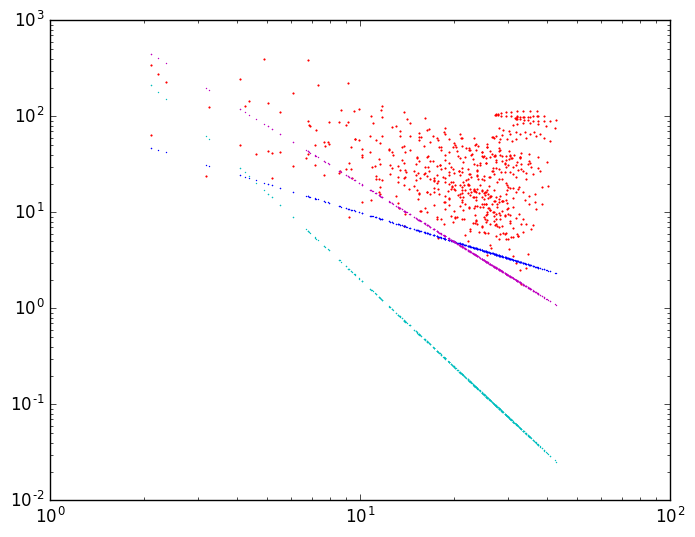

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff64dbded10>
 PyObject <matplotlib.lines.Line2D object at 0x7ff64dbaad10>
 PyObject <matplotlib.lines.Line2D object at 0x7ff64dbc2110>

In [56]:
#Compute forces on shift-equilibrated solution obtained above
loglog(r,f, "r.", markersize=2)
loglog(r,1e2 * r.^(-1), "b.", r,2e3 * r.^(-3), "c.", r,2e3 * r.^(-2), "m.",markersize=1)

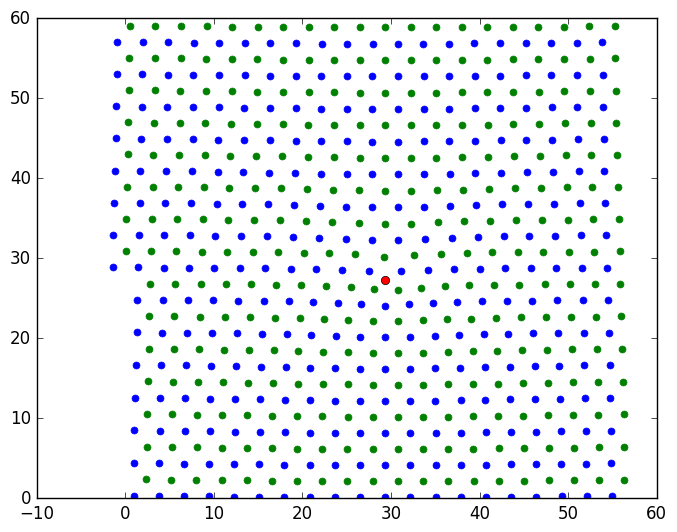

 a : 4.05xc: 27.92187902210379 yc: 29.3625 minimum index : [286,315] minimum : 1.5377343749999823I0 = 315
X12[I0] = [28.6378,28.35]
xcore = [29.3538,27.3375]


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff655014e50>

In [11]:
# anisotropic elasticity solution for an FCC edge dislocation obtained by applying anisotropic solution to each atom
# Use this to compare to at from above
reload("MaterialsScienceTools")
calc = lennardjones_eq("Al")
atY, xcoreY = MaterialsScienceTools.Dislocations_Al_hard_110.fcc_edge_geom("Al", 8.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1,eos_correction=true)
Y = positions(at) |> mat
xY, yY, zY = Y[1,:], Y[2,:], Y[3,:]
set_calculator!(atY, calc)
xcoreY = [xcoreY[1], xcoreY[2],0] #append a zero to xcore
I0Y = find(Y[3,:] .== 0)
I1Y = find(Y[3,:] .> 0)
plot(xY[I0Y], yY[I0Y], "b.", markersize=10)
plot(xY[I1Y], yY[I1Y], "g.", markersize=10)
plot([xcoreY[1]], [xcoreY[2]], "ro")

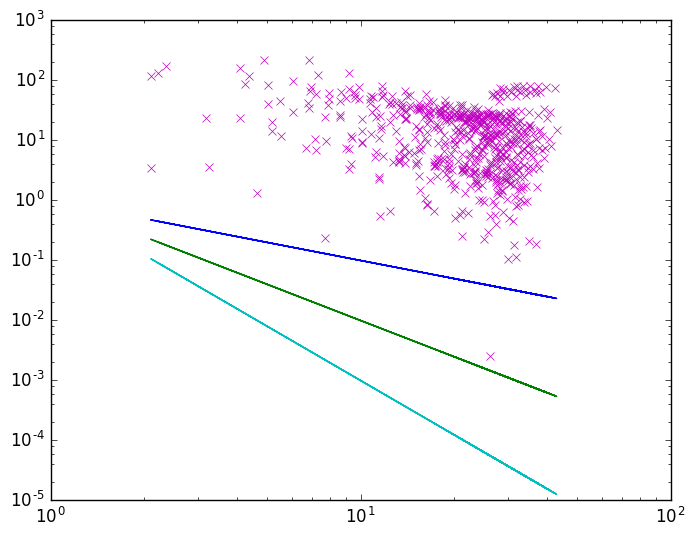

count : 601

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff64d585310>

In [65]:
set_pbc!(at, (false, false, true))
F = forces(at)
FY = forces(atY)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
fY = [norm(g) for g in FY]
nu = length(f)
pip = zeros(nu,1)
inner = ones(nu)
inner_force = ones(nu)
count = 1
for i=1:nu
    #pip[i,1] = norm([xP[i];yP[i]]-[xcore[1]; xcore[2]])
    #if  (-7.15 > yP[i]-xcore[2] || 7.15 < yP[i]-xcore[2]) && norm([xP[i];yP[i]]-[xcore[1]; xcore[2]]) < maximum(r)/2
        #print(" here ")
        #print(xP[i]-xcore[1])
        inner[count] =r[i]
    inner_force[count]= norm(F[i][1])#f[i]
        #print(" force :")
        #print(F[i])
        count = count +1
    #end
end
print("count : ")
print(count)
ITEST = find(log(pip[:,1]) .> 1.0)
v = x[ITEST]
u = y[ITEST]
#fTest = [norm(F(i)) for i in ITEST]
#plot(x[ITEST], y[ITEST], "b.", markersize=10)
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = r.^(-3)  #plot line of slope three
#loglog(pip,f, "mx")
loglog(inner,inner_force, "mx")
#loglog(r,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "b-")
loglog(r,w, "c-")

In [69]:
#Compare the difference in atom positions between atY (anistropic everywhere) 
#and at (anistropic + shift equilibration)
Z = positions(atY)
vu = length(Z)
for i=1:300
    @show i
    @show Z[2*i]-X[i+300]
    @show fY[i] - f[i]
end

i = 1
Z[2i] - X[i + 300] = [0.00686303,-0.00176288,-2.22045e-16]
fY[i] - f[i] = -57.260795905477366
i = 2
Z[2i] - X[i + 300] = [0.0106313,0.00024853,4.44089e-16]
fY[i] - f[i] = -66.98859318546148
i = 3
Z[2i] - X[i + 300] = [0.0154115,0.00228265,1.77636e-15]
fY[i] - f[i] = -65.50543163690065
i = 4
Z[2i] - X[i + 300] = [0.0207337,0.0035359,2.88658e-15]
fY[i] - f[i] = -68.84673256707869
i = 5
Z[2i] - X[i + 300] = [0.0259086,0.00318958,4.66294e-15]
fY[i] - f[i] = -67.29428620291881
i = 6
Z[2i] - X[i + 300] = [0.0304805,0.000875341,6.21725e-15]
fY[i] - f[i] = -72.46122606717113
i = 7
Z[2i] - X[i + 300] = [0.0344015,-0.003251,7.99361e-15]
fY[i] - f[i] = -73.93801324215377
i = 8
Z[2i] - X[i + 300] = [0.033943,-0.00757366,8.43769e-15]
fY[i] - f[i] = -56.07500350844919
i = 9
Z[2i] - X[i + 300] = [0.0360753,-0.0125053,9.54792e-15]
fY[i] - f[i] = -79.05311377226629
i = 10
Z[2i] - X[i + 300] = [0.0371761,-0.0171574,9.99201e-15]
fY[i] - f[i] = -84.06674160926853
i = 11
Z[2i] - X[i + 300] = [0.03667

In [34]:
atCopy = ASEAtoms(string("Al",nu))
set_positions!(atCopy, X)

JuLIP.ASE.ASEAtoms(PyObject Atoms(symbols='Al600', pbc=[False, False, False], cell=[1.0, 1.0, 1.0], positions=...),JuLIP.NullCalculator(),JuLIP.NullConstraint(),Dict{Symbol,JuLIP.ASE.TransientData}())

In [48]:
XCopy = zeros(X)
for i=1:300
    XCopy[2*i-1] = X[i]
    XCopy[2*i] = X[i]+[4.05*(1/2)*1/sqrt(2),4.05*1/2,4.05*1/(2*sqrt(2))]
end
atCopy = ASEAtoms(string("Al",600))
set_positions!(atCopy, XCopy)

JuLIP.ASE.ASEAtoms(PyObject Atoms(symbols='Al600', pbc=[False, False, False], cell=[1.0, 1.0, 1.0], positions=...),JuLIP.NullCalculator(),JuLIP.NullConstraint(),Dict{Symbol,JuLIP.ASE.TransientData}())

In [37]:
Z = positions(atY)
vu = length(Z)
for i=1:300
    @show Z[i]-XCopy[i]
end

Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.00678142,-0.00185099,-2.22045e-16]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0105385,0.000150741,6.66134e-16]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0153141,0.00218236,1.9984e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0206426,0.00344274,3.10862e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0258355,0.00311122,4.88498e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0304339,0.000813589,6.43929e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0343844,-0.00330018,7.99361e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0339514,-0.00761267,8.65974e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0361007,-0.0125426,9.54792e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.037211,-0.0171941,9.99201e-15]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.0367096,-0.0206035,1.08802e-14]
Z[i] - XCopy[i] = [0.0,0.0,0.0]
Z[i] - XCopy[i] = [0.034329,

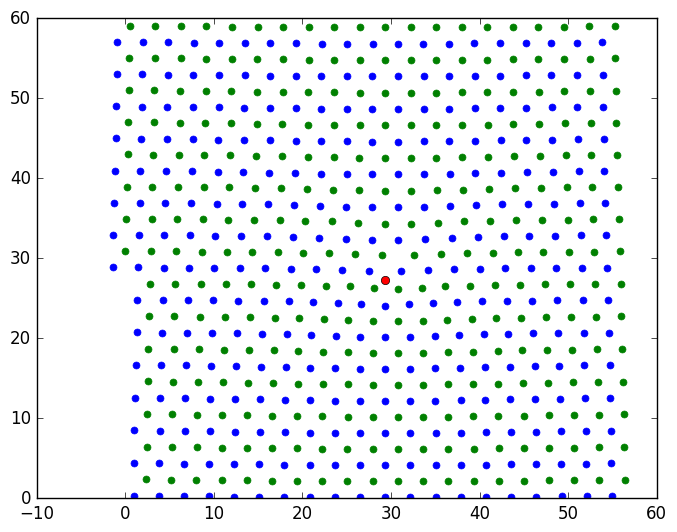

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff65465e790>

In [50]:
reOrder = positions(atCopy) |> mat
xRe, yRe, zRe = reOrder[1,:], reOrder[2,:], reOrder[3,:]
set_calculator!(atCopy, calc)
xcore = [xcore[1], xcore[2],0] #append a zero to xcore
I0Z = find(reOrder[3,:] .== 0)
I1Z = find(reOrder[3,:] .> 0)
plot(xRe[I0Z], yRe[I0Z], "b.", markersize=10)
plot(xRe[I1Z], yRe[I1Z], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")